# Credit Card application approvals 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
card_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data")
card_df.head(10)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,00128,0,+


In [3]:
columns = ["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", 
           "Employed", "CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income", "ApprovalStatus"]

In [4]:
card_df.columns = columns

In [5]:
card_df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [6]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  ApprovalStatus  689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


In [7]:
card_df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


In [8]:
card_df.shape

(689, 16)

In [9]:
card_df.tail(15)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
674,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
675,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
676,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
677,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
678,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
679,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
680,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
681,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-
682,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,00240,3,-
683,b,40.58,3.290,u,g,m,v,3.500,f,f,0,t,s,00400,0,-


In [8]:
card_df.ApprovalStatus.value_counts()

-    383
+    306
Name: ApprovalStatus, dtype: int64

Text(0.5, 1.0, 'Credit card approvals')

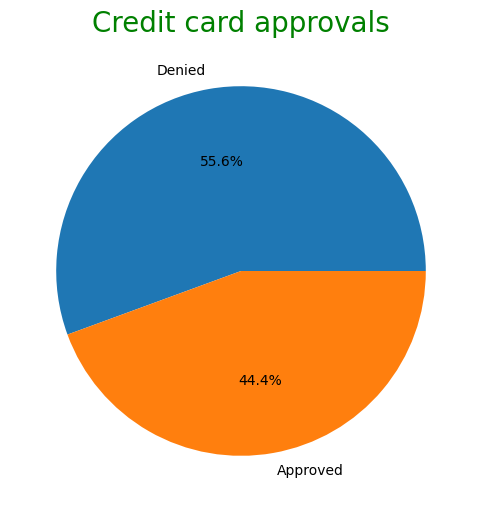

In [11]:
labels=["Denied", "Approved"]
plt.figure(figsize=(12,6))
plt.pie(x = card_df.ApprovalStatus.value_counts(),labels=labels, autopct = "%1.1f%%")
plt.title("Credit card approvals", color ="green", fontsize=20)

### Splitting the dataset into training and testing data 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
card_df = card_df.drop(["DriversLicense","ZipCode"], axis =1)

In [11]:
card_df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,g,0,+


In [12]:
card_train, card_test = train_test_split(card_df, test_size=0.33, random_state=42)

## Handling missing values 

In [13]:
card_train = card_train.replace("?", np.NAN)
card_test = card_test.replace("?", np.NAN)

In [14]:
card_train.isnull().sum()

Gender            10
Age                8
Debt               0
Married            6
BankCustomer       6
EducationLevel     8
Ethnicity          8
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
Citizen            0
Income             0
ApprovalStatus     0
dtype: int64

In [15]:
card_test.isnull().sum()

Gender            2
Age               4
Debt              0
Married           0
BankCustomer      0
EducationLevel    1
Ethnicity         1
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64

In [16]:
card_train.fillna(card_train.mean(), inplace =True)
card_test.fillna(card_test.mean(), inplace =True)

C:\Users\alexm\AppData\Local\Temp\ipykernel_11396\1964085335.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  card_train.fillna(card_train.mean(), inplace =True)
C:\Users\alexm\AppData\Local\Temp\ipykernel_11396\1964085335.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  card_test.fillna(card_test.mean(), inplace =True)


In [17]:
# We count again the number of null values. There are more missing values for the non numeric columns 

In [18]:
card_train.isnull().sum()

Gender            10
Age                8
Debt               0
Married            6
BankCustomer       6
EducationLevel     8
Ethnicity          8
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
Citizen            0
Income             0
ApprovalStatus     0
dtype: int64

In [19]:
card_test.isnull().sum()

Gender            2
Age               4
Debt              0
Married           0
BankCustomer      0
EducationLevel    1
Ethnicity         1
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64

In [20]:
card_train.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
Citizen            object
Income              int64
ApprovalStatus     object
dtype: object

In [21]:
for column in card_train.columns:
    if card_train[column].dtypes == 'object':
        card_train = card_train.fillna(card_train[column].value_counts().index[0])
        card_test = card_test.fillna(card_train[column].value_counts().index[0])

print(card_train.isnull().sum())
print(card_test.isnull().sum())

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64


## Preprocessing the data 

 Before building the machine learning model, firstly we will convert the non numeric data into numeric, 
and secondly we will scale the data 

In [22]:
card_train = pd.get_dummies(card_train)
card_test = pd.get_dummies(card_test)
card_test = card_test.reindex(columns = card_train.columns, fill_value = 0)

In [27]:
card_train

,Debt,YearsEmployed,CreditScore,Income,Gender_a,Gender_b,Age_13.75,Age_15.17,Age_15.83,Age_16.00,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,Citizen_g,Citizen_p,Citizen_s,ApprovalStatus_+,ApprovalStatus_-
382,4.250,5.000,0,4,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
137,9.500,1.625,6,600,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
346,4.500,2.500,0,1210,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
326,3.500,0.500,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
33,10.750,0.415,5,560,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5.000,13.500,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
106,11.000,4.500,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
270,2.500,1.250,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
435,0.585,0.000,3,769,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1


In [23]:
card_test.head(15)

,Debt,YearsEmployed,CreditScore,Income,Gender_a,Gender_b,Age_13.75,Age_15.17,Age_15.83,Age_16.00,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,Citizen_g,Citizen_p,Citizen_s,ApprovalStatus_+,ApprovalStatus_-
286,0.580,0.290,1,2803,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
655,3.250,2.290,1,21,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
257,9.540,0.040,0,1000,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
336,1.250,0.500,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
318,0.125,1.500,0,113,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
211,14.500,18.000,15,1000,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
623,0.790,0.665,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
176,8.665,1.415,0,150,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
574,0.165,3.250,1,8000,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
256,0.000,0.500,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
X_train, y_train = card_train.iloc[:, :-1].values, card_train.iloc[:, [-1]].values
X_test, y_test = card_test.iloc[:, :-1].values, card_test.iloc[:, [-1]].values

In [31]:
scaler = MinMaxScaler()

In [32]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.fit_transform(X_test)

## Logistic Regression Model 

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model_lr = LogisticRegression()

In [36]:
model_lr.fit(X= scaledX_train, y= y_train)

C:\Users\alexm\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## Prediction and evaluation performance 

In [43]:
pred_lr = model_lr.predict(scaledX_test)

In [44]:
print("The accuracy of the Logistic model for predicting credit card applications is ", model_lr.score(scaledX_test, y_test))

The accuracy of the Logistic model for predicting credit card applications is  1.0


In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test, pred_lr)

array([[100,   0],
       [  0, 128]], dtype=int64)

The model is able to predict correctly all the 100 card applications that were denied and the 128 card applications that were accepted

### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_dt = DecisionTreeClassifier()

In [49]:
model_dt.fit(X=scaledX_train, y=y_train, )

DecisionTreeClassifier()

In [50]:
pred_dt = model_dt.predict(X=scaledX_test)

In [51]:
print("The accuracy of the Decision Tree Classifier for predicting credit card applications is ", model_dt.score(scaledX_test, y_test))

The accuracy of the Decision Tree Classifier for predicting credit card applications is  1.0


## Support Vector Classifier 

In [52]:
from sklearn.svm import SVC

In [53]:
model_sv = SVC()

In [56]:
model_sv.fit(X=scaledX_train, y=y_train, )

C:\Users\alexm\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [58]:
pred_svc=model_sv.predict(scaledX_test)

In [64]:
print("The accuracy of the Support Vector Classifier for predicting credit card applications is ", model_sv.score(scaledX_test, y_test))

The accuracy of the Support Vector Classifier for predicting credit card applications is  1.0


In [61]:
df_pred = pd.DataFrame(y_test, columns=["ApprovalStatus"])
df_pred["lr_pred"] = pred_lr
df_pred["dt_pred"] = pred_dt
df_pred["pred_svc"] = pred_svc
df_pred.head(10)



,ApprovalStatus,lr_pred,dt_pred,pred_svc
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,0,0,0,0
5,0,0,0,0
6,1,1,1,1
7,0,0,0,0
8,0,0,0,0
9,1,1,1,1
